# **PCS5042 - AI Informada por Leis Físicas - Ex01A**

### Gustavo Henrique do Nascimento (14249084) --- Marcelo Marcelo Baccaro (8989262)

Do artigo [1], tem-se a equação diferencial parcial não-linear hiperbólica de transporte (equação 17 no artigo [1]):

$$u_{t} + (f(u))_{x} = 0 \quad \Rightarrow \quad \frac{\partial u}{\partial t} + \frac{\partial}{\partial x}(f(u)) = 0 \quad \Rightarrow \quad \frac{\partial u}{\partial t} + \frac{\partial f}{\partial u} \cdot \frac{\partial u}{\partial x} = 0 \quad \Rightarrow \quad \frac{\partial u}{\partial t} + a(u) \cdot \frac{\partial u}{\partial x} = 0$$

Esta EDP é uma modificação (normalização) do modelo unidimensional no espaço de Buckley-Leverett para transporte com duas fases, em que a variavel $u = u(t,x)$ corresponde à satuaração de um dos fluídos. Considera-se o seguinte modelo não-convexo (equação 20 no artigo [1]) para fluxo $f(u)$:

$$ f(u) = \dfrac{u^2}{u^2 + \dfrac{(1-u)^2}{M}} \quad \Rightarrow \quad f^\prime(u) = a(u) = \dfrac{2 M u (1-u)}{((M+1) u^2 -2u + 1)^2}$$

No artigo [1], utiliza-se $M=1$ para o fluxo não-convexo. Considera-se também as duas condições de contorno (equação 18 no artigo [1]): (1) $u(x,0)=0$ para $\forall x$; e (2) $u(0,t)=1$ para $t>0$.

O artigo [2] explica como resolver esse tipo de EDP não-linear de 1ª ordem. Basicamente, as soluções seguem o seguinte formato:

$$u(t,x) = \begin{cases} u_1 \text{ , } x/t<\xi_1 \\ v(\xi) \text{ , } \xi_1 \leq x/t \leq \xi_2 \\ u_2 \text{ , } x/t>\xi_2 \end{cases}$$

sendo $\xi = x/t$, ou seja, para $\xi_1 \leq x/t \leq \xi_2$, $u(t,x) = v(x/t) = v(\xi)$. Do artigo [1], tem-se que $u_1=1$ e $u_2=0$. Provar que essa solução do arigo [2] funciona requer apenas algumas substituições e um pouco de álgebra:

$$\frac{\partial u}{\partial t} = \frac{\partial}{\partial t} (v(\xi)) = \frac{\partial v(\xi)}{\partial \xi} \cdot \frac{\partial \xi}{\partial t} = v^\prime(\xi) \cdot \left( -\frac{x}{t^2} \right)$$

$$\frac{\partial u}{\partial x} = \frac{\partial}{\partial x} (v(\xi)) = \frac{\partial v(\xi)}{\partial \xi} \cdot \frac{\partial \xi}{\partial x} = v^\prime(\xi) \cdot \frac{1}{t}$$

Substituindo na EDP original, tem-se que:

$$-\frac{x}{t^2} \cdot v^\prime(\xi) + a(v(\xi)) \cdot \frac{1}{t} \cdot v^\prime(\xi)= 0 \quad \Rightarrow \quad (a(v(\xi)) - \xi) \cdot v^\prime(\xi) = 0 \quad \Rightarrow \quad a(v(\xi)) = \xi$$

Para o caso espacial multivariável, este problema se torna encontrar os autovalores de $A(V(\xi))$ para os respectivos autovetores de $V^\prime(\xi)$. Voltando ao fluxo não-convexo com $M=1$, tem-se que:

$$\frac{-2v^2+2v}{(2v^2-2v+1)^2} = \xi$$

Fazendo $y = 2v^2-2v$, tem-se que:

$$2v^2 -2v -y = 0 \quad \Rightarrow \quad v = \frac{1}{2} \pm \sqrt{\frac{1}{4} + \frac{y}{2}}$$

$$\frac{-y}{(y+1)^2} = \xi \quad \Rightarrow \quad y^2 + \left( 2 + \frac{1}{\xi} \right) y + 1 = 0 \quad \Rightarrow \quad y = -1 -\frac{1}{2\xi} \pm \sqrt{\left( 1 + \frac{1}{2\xi} \right)^2 - 1}$$

Como $u(t,x)=v(x/t)=v(\xi) \in [0,1]$, então apenas as raízes positivas devem ser escolhidas, resultando em:

$$v(\xi) = \frac{1}{2} + \sqrt{\frac{1}{2} \sqrt{\left(1+\frac{1}{2\xi}\right)^2-1} -\frac{1}{4} -\frac{1}{4\xi}}$$

Agora as condições de contorno. O artigo [1] utiliza as seguintes relações:

$$\xi_1 = f^\prime(u=1) = a(1) = 0$$

$$\xi_2 = f^\prime(u=u_s) = a(u_s) = \frac{f(u_s)-f(u)|_{u=0}}{u_s-u|_{u=0}} = \frac{f(u_s)}{u_s} \quad \Rightarrow \quad \frac{2 u_s (1-u_s)}{(2u_s^2-2u_s+1)^2} = \frac{u_s^2}{2u_s^2-2u_s+1} \cdot \frac{1}{u_s}$$

em que $u_s$ corresponde ao valor de choque (*shock*) entre as duas fases formando uma frente de onda conforme a condição de Rankine-Hugoniot. A equação acima pode ser simplificada para:

$$\frac{2(1-u_s)}{2u_s^2-2u_s+1} = 1 \quad \Rightarrow \quad u_s = \pm \sqrt{\frac{1}{2}}$$

Como $u_s \in [0,1]$, então $u_s = \sqrt{0,5} \approx 0.707$. Logo, tem-se que $\xi_2 = a(u_s) \approx 1.207$. A abordagem analítica está resolvida.

#### Referências
[1] Limitations of physics informed machine learning for nonlinear two-phase transport in porous media - Fuks (2020)\
[2] Nonlinear hyperbolic conservation laws - A brief informal introduction - Karni (2011)

Enfim, podemos começar a programar!!
Iniciando com a condição de contorno de choque para 3 instantes: 0,25, 0,5 e 0,75.

In [1]:
import numpy as np
us = np.sqrt(0.5) # saturação de shock
xi_s = 2*us*(1-us) / (2*us**2 -2*us +1)**2 # xi shock
ts = np.array([0.25, 0.5, 0.75]) # time sample
xs = ts * xi_s # shock position

Agora declarando os vetores do tempo $t$, do espaço $x$ e da razão $\xi=x/t$ para cada instante.

In [2]:
x_step = 1e-3 # passo em x
x1 = np.arange(x_step, xs[0], x_step)
t1 = ts[0]
xi1 = x1 / t1
x2 = np.arange(x_step, xs[1], x_step)
t2 = ts[1]
xi2 = x2 / t2
x3 = np.arange(x_step, xs[2], x_step)
t3 = ts[2]
xi3 = x3 / t3

Calcular a curva da saturação em função do espaço $x$ é simples pois temos a solução analítica.
Para o instante 0,25:

In [3]:
u1 = 0.5 + np.sqrt(np.sqrt((1+0.5/xi1)**2-1)/2 -0.25 -0.25/xi1)
x1 = np.append([[0]], x1) # ajuste do vetor x1
x1 = np.append(x1, [[xs[0],1]])
u1 = np.append([[1]], u1) # ajuste do vetor u1
u1 = np.append(u1, [[0,0]])

Para o instante 0,5:

In [4]:
u2 = 0.5 + np.sqrt(np.sqrt((1+0.5/xi2)**2-1)/2 -0.25 -0.25/xi2)
x2 = np.append([[0]], x2) # ajuste do vetor x2
x2 = np.append(x2, [[xs[1],1]])
u2 = np.append([[1]], u2) # ajuste do vetor u2
u2 = np.append(u2, [[0,0]])

E para o instante 0,75:

In [5]:
u3 = 0.5 + np.sqrt(np.sqrt((1+0.5/xi3)**2-1)/2 -0.25 -0.25/xi3)
x3 = np.append([[0]], x3) # ajuste do vetor x3
x3 = np.append(x3, [[xs[2],1]])
u3 = np.append([[1]], u3) # ajuste do vetor u3
u3 = np.append(u3, [[0,0]])

Gráficos da curvas de saturação nos 3 instantes:

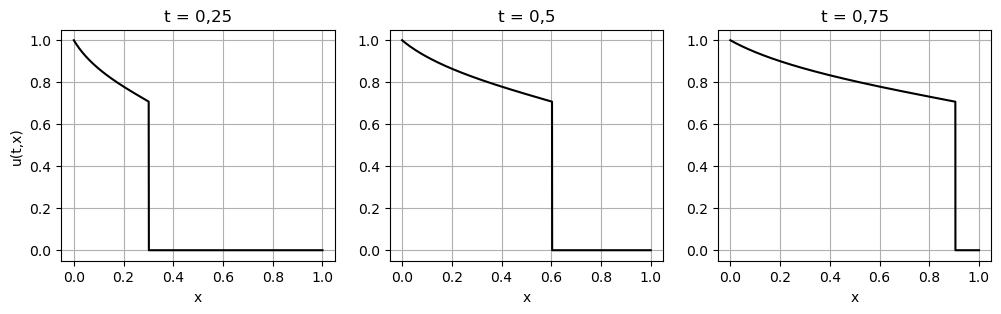

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 3))

plt.subplot(131)
plt.plot(x1, u1, 'k')
plt.xlabel('x')
plt.ylabel('u(t,x)')
plt.title('t = 0,25')
plt.grid(True)

plt.subplot(132)
plt.plot(x2, u2, 'k')
plt.xlabel('x')
plt.title('t = 0,5')
plt.grid(True)

plt.subplot(133)
plt.plot(x3, u3, 'k')
plt.xlabel('x')
plt.title('t = 0,75')
plt.grid(True)

plt.show()

Animação:

In [22]:
import matplotlib.animation as animation
from IPython.display import display, HTML
fig = plt.figure()
axis = plt.axes(xlim=(-0.05,1.05),ylim=(-0.05,1.05),xlabel=('x'),ylabel=('u(t,x)'))
line = axis.plot([], [], color='k', lw=2)[0]
plt.grid(True)
us = np.sqrt(0.5) # saturação de shock
xi_s = 2*us*(1-us) / (2*us**2 -2*us +1)**2 # xi shock
x_step = 1e-3 # passo em x
n_frame = 100 # número de frames
n_int = 20 # número de intervalo
x_max = 1
t_max = x_max / xi_s

def init():
    line.set_data([], [])
    return line,

def animate(t):
    time = t / n_frame * t_max
    xs = time * xi_s # shock position
    x = np.arange(x_step, xs, x_step)
    xi = x / time;
    y = 0.5 + np.sqrt(np.sqrt((1+0.5/xi)**2-1)/2 -0.25 -0.25/xi)
    x = np.append([[0]], x) # ajuste do vetor x
    x = np.append(x, [[xs,1]])
    y = np.append([[1]], y) # ajuste do vetor y
    y = np.append(y, [[0,0]])
    line.set_data(x, y)
    axis.set_title(u"Time: {:.5f}".format(time))
    return line,

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=n_frame+1, interval=n_int)#, blit=True)
plt.close()
display(HTML(anim.to_html5_video()))